<a href="https://colab.research.google.com/github/VikaBilyk/mss/blob/main/mss-lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домінуючі частоти: [14.97005988]


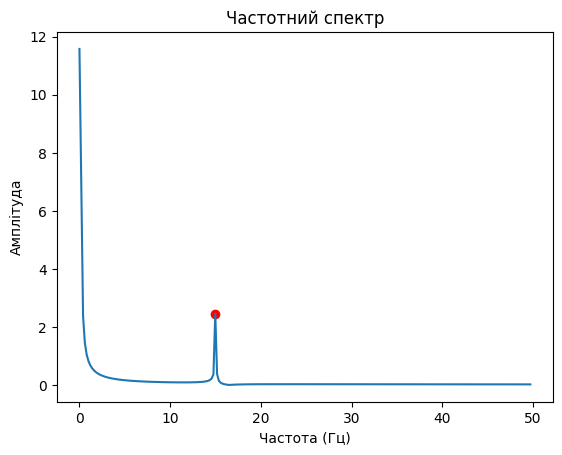

Оптимальні параметри моделі: [ 1.21575812 -8.8347805   9.543564    1.03893286  0.4103057 ]


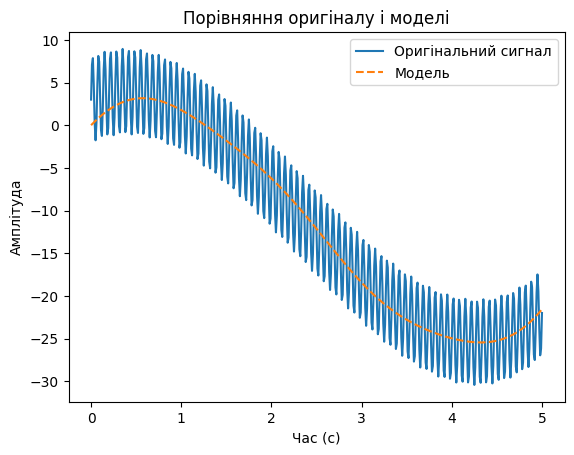

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Завантаження даних з файлу
signal_values = np.loadtxt('f2.txt')

# Встановлення параметрів часової області
total_signal_duration = 5  # Загальна тривалість сигналу
number_of_samples = len(signal_values)
sampling_time_interval = 0.01
time_values = np.arange(0, number_of_samples * sampling_time_interval, sampling_time_interval)

# 1. Виконання дискретного перетворення Фур'є
def compute_fft(signal, number_of_samples, sampling_interval):
    fft_coefficients = np.fft.fft(signal) / number_of_samples
    frequency_values = np.fft.fftfreq(number_of_samples, sampling_interval)
    return fft_coefficients, frequency_values

# Виклик функції для ДПФ
fft_coefficients, frequency_values = compute_fft(signal_values, number_of_samples, sampling_time_interval)

# 2. Визначення амплітуди спектра та пошук пікових значень
amplitude_spectrum = np.abs(fft_coefficients)

# Функція для пошуку піків в амплітудному спектрі
def identify_peak_frequencies(spectrum, number_of_samples, threshold=0.5):
    peak_indices, _ = find_peaks(spectrum[:number_of_samples], height=threshold)
    return peak_indices

# Пошук пікових частот
peak_indices = identify_peak_frequencies(amplitude_spectrum, number_of_samples // 2, threshold=0.5)
dominant_frequency_values = frequency_values[peak_indices]

print("Домінуючі частоти:", dominant_frequency_values)

# 3. Побудова графіка частотного спектра
def plot_amplitude_spectrum(frequencies, amplitudes, peak_indices, title='Частотний спектр'):
    plt.figure()
    plt.plot(frequencies, amplitudes)
    plt.scatter(frequencies[peak_indices], amplitudes[peak_indices], color='red')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Амплітуда')
    plt.title(title)
    plt.show()

# Відображення спектра з піками
plot_amplitude_spectrum(frequency_values[:number_of_samples // 2], amplitude_spectrum[:number_of_samples // 2], peak_indices)

# 4. Модель апроксимації сигналу
def sine_wave_approximation_model(time_values, a1, a2, a3, *harmonic_params):
    number_of_harmonics = len(harmonic_params) // 2
    result = a1 * time_values**3 + a2 * time_values**2 + a3 * time_values
    for i in range(number_of_harmonics):
        harmonic_frequency = harmonic_params[i]
        harmonic_amplitude = harmonic_params[number_of_harmonics + i]
        result += harmonic_amplitude * np.sin(2 * np.pi * harmonic_frequency * time_values - 3 * time_values)
    return result

# 5. Використання методу найменших квадратів для підбору параметрів моделі
initial_model_guess = [1, 1, 1] + [1] * (len(dominant_frequency_values) * 2)

def fit_signal_to_model(time_values, signal_values, initial_guess):
    optimized_parameters, parameter_covariance = curve_fit(sine_wave_approximation_model, time_values, signal_values, p0=initial_guess)
    return optimized_parameters

# Отримання оптимальних параметрів моделі
optimal_model_parameters = fit_signal_to_model(time_values, signal_values, initial_model_guess)
print("Оптимальні параметри моделі:", optimal_model_parameters)

# 6. Генерація даних на основі моделі
def compute_fitted_signal(time_values, model_parameters):
    return sine_wave_approximation_model(time_values, *model_parameters)

# Генерація апроксимованих значень сигналу
fitted_signal_values = compute_fitted_signal(time_values, optimal_model_parameters)

# 7. Візуалізація порівняння оригінальних даних та моделі
def plot_signal_comparison(time_values, original_signal_values, fitted_signal_values, title='Порівняння оригіналу і моделі'):
    plt.figure()
    plt.plot(time_values, original_signal_values, label='Оригінальний сигнал')
    plt.plot(time_values, fitted_signal_values, label='Модель', linestyle='--')
    plt.xlabel('Час (с)')
    plt.ylabel('Амплітуда')
    plt.legend()
    plt.title(title)
    plt.show()

# Відображення результатів порівняння
plot_signal_comparison(time_values, signal_values, fitted_signal_values)
